<div align="center" style="margin-bottom: 0; color: #cb76dd;">
    <h1 style="margin: 0;">5IC-IG2 Traitement flux vidéo
</h1>
    <h4 style="margin: 15px 0;">2024 - 2025, ESIEE-IT</h4>
    <h4 style="margin: 5px 0;">Enseigné par Badr TAJINI</h4>
</div>

<br><br>

<div align="center" style="margin-bottom: 0; color: #005E99;">
    <h2 style="margin: 0;">TD5 : People counter</h2>
    <h4 style="margin: 5px 0;">Réalisé par Samuel CRDOSO & Kevin TCHA</h4>
</div>

<br> 

---

<h3>Chargement des bibliothèques et configurations des paramètres</h3>

In [11]:
# Import des bibliothèques nécessaires
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scripts.people_counter_jupyter import people_counter

# Chemins vers les fichiers et modèles
prototxt_path = "mobilenet_ssd/MobileNetSSD_deploy.prototxt"
model_path = "mobilenet_ssd/MobileNetSSD_deploy.caffemodel"
video_path = "videos/6.mp4"  # Remplacez par None pour utiliser la webcam
confidence=0.4, # Filtre pour les détections faibles
skip_frames=5  # Frames sautées pour la détection

# On vérifie que les fichiers existent
import os
assert os.path.exists(prototxt_path), "Le fichier prototxt est introuvable."
assert os.path.exists(model_path), "Le modèle Caffe est introuvable."
assert os.path.exists(video_path), "La vidéo spécifiée est introuvable."

<h3>Exécution de l'algorithme de comptage</h3>

In [1]:
# totalUp, totalDown = people_counter(
#     prototxt="mobilenet_ssd/MobileNetSSD_deploy.prototxt",
#     model="mobilenet_ssd/MobileNetSSD_deploy.caffemodel",
#     input_video=video_path,
#     confidence=confidence,
#     skip_frames=skip_frames
# )

<h3>Affichage de la dernière image de sortie</h3>

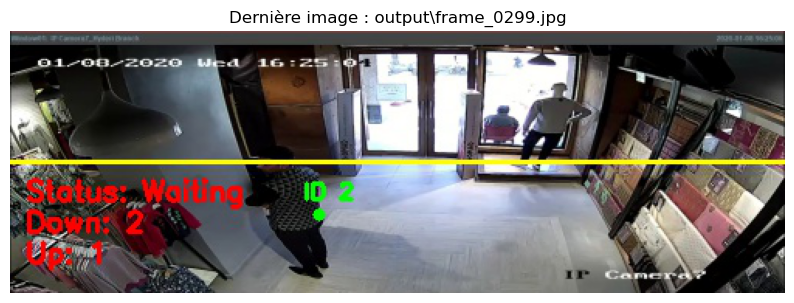

In [19]:
# Chargement de toutes les images sauvegardées dans le répertoire des sorties
output_images = sorted(glob.glob("output/*.jpg"))

# On vérifie s'il y a des images dans le répertoire
if output_images:
    # Chargement de la dernière image
    last_image_path = output_images[-1]
    last_image = cv2.imread(last_image_path)

    # Affichage de la dernière image
    plt.figure(figsize=(10, 6))
    plt.axis("off")
    plt.title(f"Dernière image : {last_image_path}")
    plt.imshow(cv2.cvtColor(last_image, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Aucune image trouvée dans le répertoire 'output/'.")

<h3>Affichage des statistiques</h3>

In [20]:
print("Statistiques finales :")
print(f"- Total Up: {totalUp}")
print(f"- Total Down: {totalDown}")

Statistiques finales :
- Total Up: 1
- Total Down: 2


## Rapport TD5 : People Counter

### Introduction
Ce TD vise à concevoir un système de comptage de personnes utilisant des algorithmes de vision par ordinateur. À partir d'une vidéo, l'objectif est de détecter les personnes entrant ou sortant d'une zone spécifique et d'afficher des statistiques sur ces mouvements. Nous avons utilisé un modèle MobileNet SSD pré-entraîné pour la détection des personnes et un tracker pour le suivi des objets.

---

### Matériel Utilisé
- **Vidéo utilisée** : `6.mp4`
- **Modèle utilisé** : MobileNet SSD (Caffe)
- **Tracker utilisé** : Correlation Tracker de Dlib
- **Environnement** : Python, OpenCV, Jupyter Notebook

---

### Méthodologie

#### **Chargement de la Vidéo**
La vidéo `6.mp4` a été chargée dans le programme. Les frames sont traitées en sautant toutes les 5 frames pour accélérer le traitement.

#### **Détection des Objets**
Chaque 5 frames, le modèle MobileNet SSD détecte les personnes présentes dans la vidéo. Les coordonnées des boîtes englobantes sont ensuite transmises au tracker.

#### **Suivi des Objets**
Les trackers sont initialisés pour suivre les objets détectés entre les frames. Cela permet de réduire la charge de recalcul des détections.

#### **Détermination des Directions**
Chaque personne détectée est associée à un ID unique. Lorsqu'une personne traverse la ligne jaune au milieu de la vidéo, elle est comptabilisée comme allant vers le haut ("Up") ou vers le bas ("Down"), en fonction de sa direction.

#### **Affichage et Sauvegarde**
Les frames annotées ont été sauvegardées dans le répertoire `output/` et affichées dans le notebook. Les statistiques finales sont également affichées après le traitement complet de la vidéo.

---

### Résultats

#### **Frames Annotées**
Voici quelques frames annotées illustrant les résultats :

**Frame 82** :
   ![Frame 82](output/frame_0082.jpg)

**Frame 132** :
   ![Frame 132](output/frame_0132.jpg)

**Frame 228** :
   ![Frame 228](output/frame_0228.jpg)

**Frame 299** :
   ![Frame 299](output/frame_0299.jpg)

#### **Statistiques finales**
- **Total Up (montée) :** 1
- **Total Down (descente) :** 2

Ces résultats montrent que 1 personne est montée et 2 sont descendues pendant la durée de la vidéo.

---

### Analyse

- **Durée du traitment :** 42.93 secondes.
- **Fréquence de traitement :** Environ 6,99 FPS, ce qui est acceptable pour ce type d'application.
- **Détection fiable :** Le modèle MobileNet SSD a correctement détecté les personnes dans la vidéo, bien que des améliorations pourraient être apportées pour gérer les cas d'occlusion.
- **Tracking :** Le Correlation Tracker a permis de suivre les objets efficacement, mais il est sensible aux occlusions prolongées.

---

### Limites et améliorations

**Occlusion :** Les trackers peuvent perdre la trace des personnes en cas d'occlusion prolongée.
**FPS :** Bien que suffisant, le traitement pourrait être accéléré.

---

### Optimisations possibles

Pour améliorer les performances et la précision, voici quelques pistes d'optimisation :

**Modèle de Détection Plus Léger :**
   - Utiliser un modèle plus léger comme `YOLOv5 Nano` ou `TensorFlow Lite` pour réduire les temps de calcul.
   - Tester des modèles optimisés pour les appareils à faible consommation (par exemple, Edge TPU).

**Tracker Plus Rapide :**
   - Remplacer le `Correlation Tracker` par un tracker plus rapide comme `MOSSE` (très rapide mais moins précis) ou `KCF`.

**Parallélisation :**
   - Effectuer la détection et le suivi en parallèle à l'aide de threads ou de multiprocessing.
   - Exploiter un GPU pour accélérer les calculs, notamment la détection avec MobileNet SSD.

**Augmenter la Taille des Frames Sautées :**
   - Actuellement, une détection est effectuée toutes les 5 frames. Cette valeur pourrait être augmentée (par exemple, toutes les 10 frames), tout en s'assurant que les trackers maintiennent leur précision.

**Optimisation de l’Algorithme :**
   - Intégrer une logique adaptative pour ajuster dynamiquement le nombre de frames sautées en fonction de la complexité des scènes.
   - Ajouter un filtre de prétraitement pour réduire le bruit ou les objets non pertinents avant la détection.

**Amélioration de la Gestion des Occlusions :**
   - Utiliser des trackers multi-objets plus avancés comme `DeepSORT` pour mieux gérer les cas d'occlusion prolongée.

---

### Conclusion
Le système de comptage a fonctionné avec précision sur la vidéo `6.mp4`, détectant correctement les mouvements vers le haut et le bas. Les résultats sont cohérents avec les attentes, et les frames annotées valident visuellement les comptages réalisés. Des pistes d'optimisation pourraient être explorées pour augmenter les performances, notamment en termes de vitesse et de gestion des cas complexes.